In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt
import gc
import time

from scipy import linalg as LA
from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [2]:
#Establecer directorio de datos

DIR='/Users/I_am_AlexX/Downloads/Telegram Desktop'
FILE='/adjmatrix_UNT.txt'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/I_am_AlexX/Downloads/Telegram Desktop/adjmatrix_UNT.txt


In [3]:
data=pd.read_table(file)

In [4]:
a=np.diag(np.ones(16748),0)
A=data-a

In [5]:
del data

In [6]:
del a

In [7]:
#Se obtiene el mismo resultado 

threshold= A.mean().mean()
threshold

0.033064517362779086

In [8]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [9]:

#Función para contruir la matriz Laplaciana a partir de la matriz de adyacencia
def lap_mat(mat,n):
   
    simm_mat = mat_shape(mat,n)
    
    Adj_mod=nx.from_numpy_matrix(simm_mat)
    L=nx.laplacian_matrix(Adj_mod)
    L_matrix=L.toarray()
    
    return L_matrix

In [10]:
#Función para obtener los valores y vectores propios de la matriz laplaciana a partir de la matriz de adyacencia
# como parámetro


def eig_val_from_lap(mat,n):
    
    inicio = time.perf_counter()
    
    simm_mat = mat_shape(mat,n)
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx)
    L_arr=L_from_Adj.toarray()
    
    L_np=np.matrix(L_arr)
    
    _vals, e_vecs = LA.eig(L_np)
    
    final = time.perf_counter()
    
    return _vals#, print("El tiempo de ejecución fue, ", final- inicio ,"segundos")#,(e_vecs) 

In [11]:
#Función para contruir la matriz de grado a partir de la de la matriz de adyacencia

def degree_mat_from_adj(mat,n):
    
    simm_mat = mat_shape(mat, n)
     
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    return deg_Mat

In [12]:
#La siguiente función sirve para obtener los elementos de la diagonal de la matriz de
# grado y la guarda en un array llamado out_p


def get_elem_in_diag(Mat):
    Mat_mod = np.squeeze(np.asarray(Mat))#convierte numpy matrix en array
    out_p=[]
    for elem in np.nditer(Mat_mod): #nditer itera sobre arrays
        if elem != 0: # omite los valores 0 en el array pues la matriz de grado fuera de la diagonal tiene solo ceros
            out_p.append(int(elem))
            
    return out_p

In [13]:
#Función para obtener el número mayor de una lista de números dentro de un array

def func(a,N):
    return np.argsort(a)[::-1][:N]

In [14]:
# El siguiente módulo, crea un array con los primeros "n" genes que deseen obtener del
# Data Frame "data"

#Parametros: data , n 

def get_genes(data,n):
    
    genes_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_genes_extracted = range(n)
    genes = np.array(genes_arr)[num_genes_extracted]
    
    return genes

In [15]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Este módulo ha sifo modificado para que sea capaz de etiquetar los nombres de los genes 
#involucrados

def plt_with_label(mat,n):
    
    simm_mat = mat_shape(mat, n)
    
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    labelmap=dict(zip(adj_to_graph.nodes(),get_genes(data,n)))
    
    plt.figure(1,figsize=(16,16))
    
    nx.draw(adj_to_graph, labels=labelmap, with_labels=True,
    font_size=15,font_weight='bold',font_color='black',edge_color='gray',node_color='green',node_size=200)
    
    graph_with_lab=plt.show()
    
    return graph_with_lab

In [16]:
# función para ordenar los elementos de un array de menor a mayor según su valor
def sort_arr(x):
    for i in range(len(x)): # se debe iterar sobre todos los elementos del array
        swap = i + np.argmin(x[i:]) # cada que se completa un ciclo del bucle vamos "eliminando" el primer elemento para el siguiente análisis
        (x[i], x[swap]) = (x[swap], x[i]) # se intercambian valores para que el número menor se ponga en el primer lugar del array para el siguiente análisis
    return x

In [65]:
get_elem_in_diag(degree_mat_from_adj(A,4))

[1, 2, 2, 3]

In [67]:
func(get_elem_in_diag(degree_mat_from_adj(A,4)),4)

array([3, 2, 1, 0], dtype=int64)

In [66]:
degree_mat_from_adj(A,4)

matrix([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 3.]])

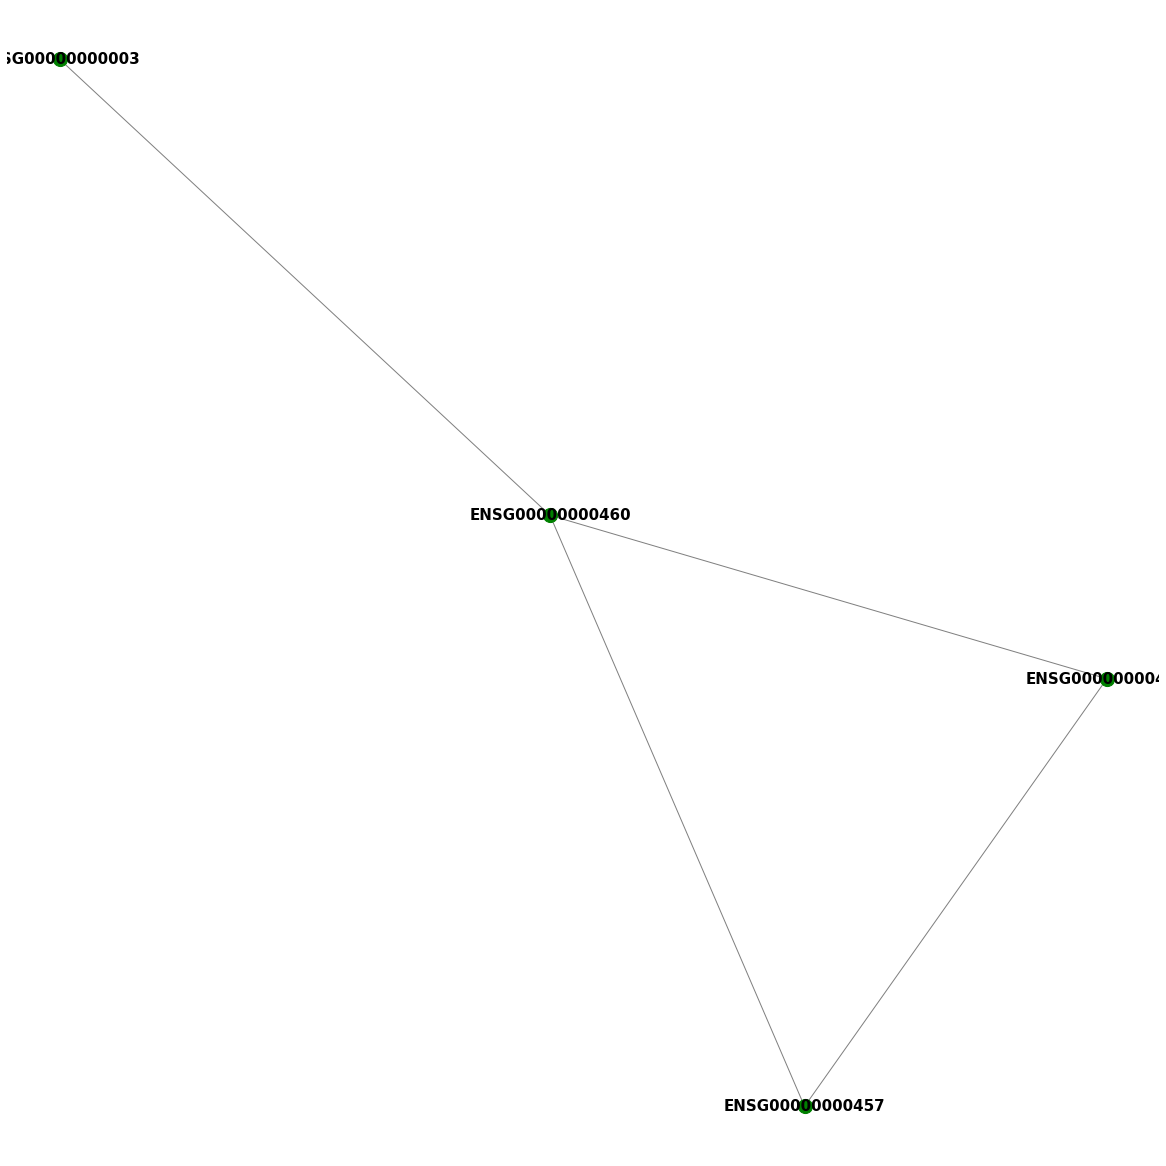

In [75]:
 plt_with_label(A,4)

In [87]:
eig_val_from_lap(A,4)

array([ 4.00000000e+00,  1.00000000e+00, -1.51136928e-16,  3.00000000e+00])

In [96]:
sort_arr(eig_val_from_lap(A,4))

array([-1.51136928e-16,  1.00000000e+00,  3.00000000e+00,  4.00000000e+00])

In [97]:
get_elem_in_diag(degree_mat_from_adj(A,4))

[1, 2, 2, 3]

In [98]:
sort(get_elem_in_diag(degree_mat_from_adj(A,4)))

[1, 2, 2, 3]

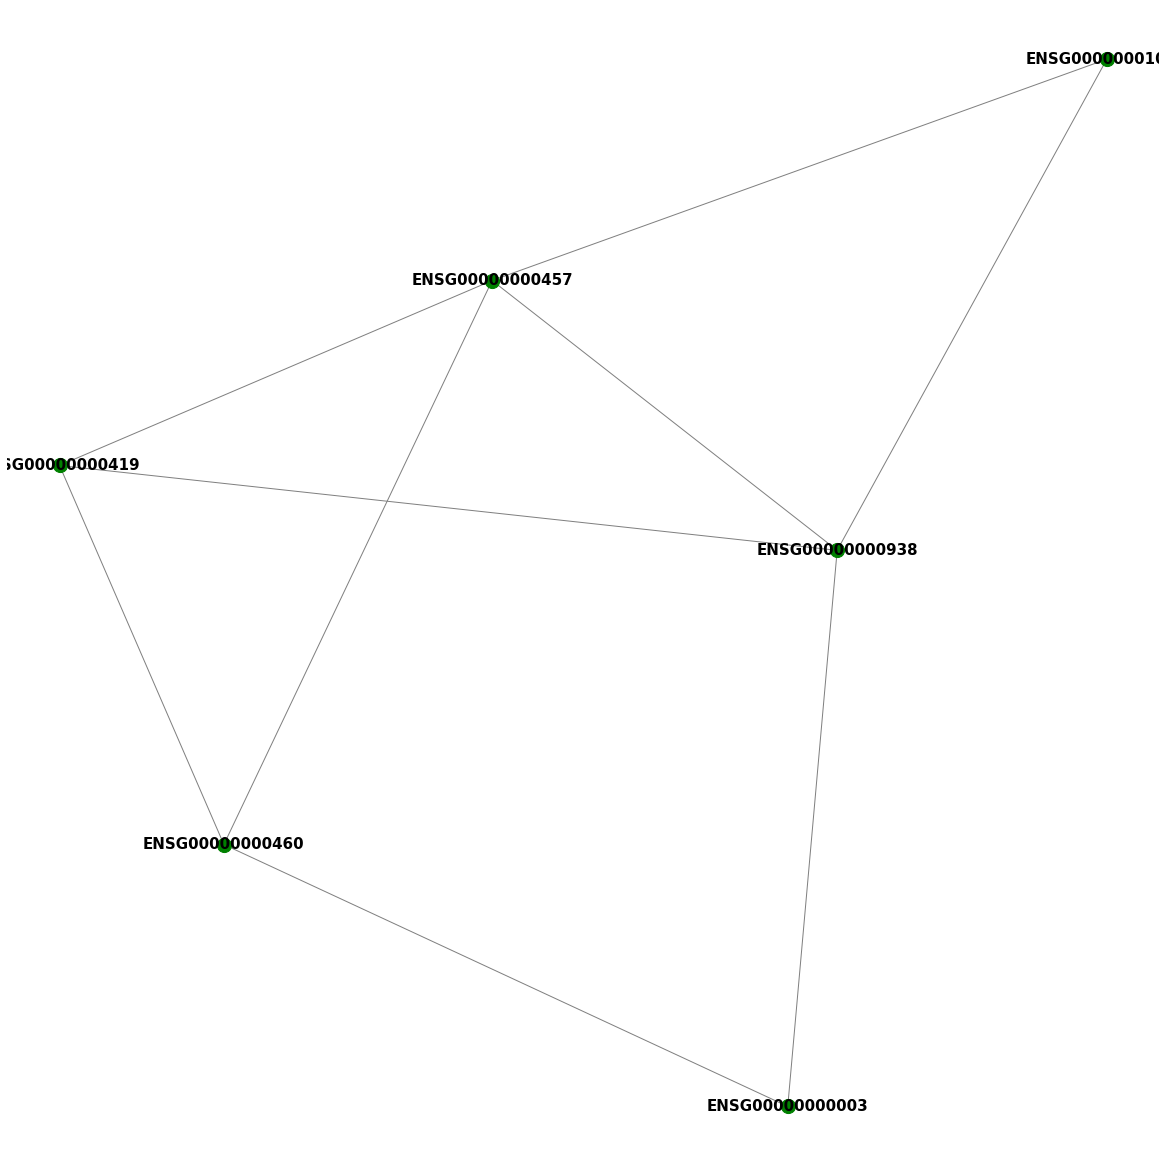

In [99]:
 plt_with_label(A,6)

In [100]:
eig_val_from_lap(A,6)

array([0.        , 1.60724375, 2.30225345, 5.58690598, 3.64052976,
       4.86306705])

In [101]:
sort_arr(eig_val_from_lap(A,6))

array([0.        , 1.60724375, 2.30225345, 3.64052976, 4.86306705,
       5.58690598])

In [103]:
sort(get_elem_in_diag(degree_mat_from_adj(A,6)))

[2, 2, 3, 3, 4, 4]

# Análisis de conectividad 

### 1000 genes

In [17]:
sort_arr(eig_val_from_lap(A,1000))

array([2.36045176e-13, 2.84493822e+02, 3.11698677e+02, 3.19106024e+02,
       3.20552056e+02, 3.25252097e+02, 3.28697723e+02, 3.31291647e+02,
       3.32006619e+02, 3.34529693e+02, 3.35239493e+02, 3.36469040e+02,
       3.37373401e+02, 3.38814916e+02, 3.39540317e+02, 3.39888942e+02,
       3.40442494e+02, 3.40881962e+02, 3.41331952e+02, 3.41650812e+02,
       3.41874101e+02, 3.42466960e+02, 3.43535647e+02, 3.43751434e+02,
       3.44723331e+02, 3.44966666e+02, 3.45547006e+02, 3.46212910e+02,
       3.46306033e+02, 3.46573737e+02, 3.47397655e+02, 3.47838474e+02,
       3.48269168e+02, 3.48622291e+02, 3.49394577e+02, 3.49521528e+02,
       3.50464965e+02, 3.50924218e+02, 3.50928057e+02, 3.51332597e+02,
       3.52145743e+02, 3.52291130e+02, 3.52701968e+02, 3.53243741e+02,
       3.53356780e+02, 3.53992529e+02, 3.54173245e+02, 3.54210659e+02,
       3.54755197e+02, 3.54910270e+02, 3.55351884e+02, 3.55532230e+02,
       3.55847354e+02, 3.56298381e+02, 3.56382031e+02, 3.56893264e+02,
      

Vemos que el segundo eigen valor más pequeño es a(G)= 284.49 

In [212]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,1000)))

[286,
 314,
 322,
 323,
 328,
 332,
 335,
 335,
 339,
 339,
 340,
 341,
 344,
 344,
 345,
 345,
 345,
 346,
 346,
 346,
 347,
 347,
 347,
 347,
 348,
 349,
 350,
 351,
 351,
 352,
 352,
 352,
 352,
 354,
 355,
 355,
 356,
 356,
 356,
 357,
 357,
 357,
 359,
 359,
 360,
 360,
 360,
 360,
 360,
 360,
 360,
 361,
 361,
 361,
 361,
 362,
 362,
 362,
 363,
 363,
 363,
 363,
 364,
 364,
 364,
 364,
 365,
 365,
 365,
 365,
 366,
 367,
 367,
 367,
 367,
 367,
 367,
 367,
 367,
 368,
 368,
 368,
 369,
 369,
 369,
 369,
 370,
 370,
 370,
 370,
 370,
 371,
 371,
 371,
 372,
 372,
 372,
 372,
 372,
 373,
 373,
 373,
 373,
 373,
 373,
 373,
 374,
 374,
 374,
 374,
 374,
 375,
 375,
 375,
 376,
 376,
 376,
 376,
 377,
 377,
 377,
 377,
 377,
 377,
 377,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 379,
 379,
 379,
 379,
 379,
 379,
 379,
 379,
 379,
 380,
 380,
 380,
 380,
 380,
 381,
 381,
 382,
 382,
 382,
 382,
 382,
 382,
 382,
 383,
 383,
 383,
 383,
 383,
 384,
 384,
 384,
 384,
 384,
 384,
 384

Vemos que el valor más pequeño de grado es 286 por lo que se obtiene al final que 284<= k(G) <= k(G')<= 286

### 2000 genes

In [210]:
sort_arr(eig_val_from_lap(A,2000))

array([-7.21880682e-13,  5.88318459e+02,  6.08016637e+02, ...,
        1.06240990e+03,  1.06992273e+03,  1.13426960e+03])

In [213]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,2000)))

[590,
 610,
 614,
 626,
 631,
 631,
 642,
 647,
 649,
 650,
 656,
 660,
 661,
 662,
 664,
 666,
 669,
 670,
 670,
 671,
 672,
 673,
 673,
 674,
 674,
 674,
 674,
 676,
 678,
 679,
 679,
 681,
 681,
 684,
 686,
 686,
 687,
 687,
 690,
 691,
 693,
 693,
 693,
 694,
 694,
 694,
 696,
 696,
 696,
 697,
 697,
 698,
 698,
 701,
 701,
 702,
 703,
 703,
 703,
 703,
 704,
 704,
 704,
 704,
 704,
 704,
 705,
 705,
 706,
 707,
 707,
 707,
 707,
 708,
 708,
 708,
 710,
 711,
 711,
 711,
 711,
 711,
 712,
 712,
 712,
 713,
 714,
 714,
 714,
 715,
 715,
 715,
 715,
 715,
 716,
 717,
 717,
 718,
 719,
 719,
 719,
 719,
 719,
 720,
 720,
 721,
 721,
 722,
 722,
 724,
 724,
 724,
 725,
 726,
 726,
 727,
 727,
 727,
 727,
 728,
 728,
 728,
 728,
 729,
 729,
 730,
 730,
 730,
 730,
 730,
 730,
 731,
 731,
 731,
 731,
 731,
 731,
 731,
 732,
 732,
 732,
 733,
 734,
 734,
 734,
 734,
 734,
 735,
 735,
 736,
 736,
 737,
 737,
 737,
 737,
 737,
 737,
 738,
 738,
 738,
 738,
 738,
 738,
 739,
 739,
 740,
 740

### 3000 genes

In [214]:
sort_arr(eig_val_from_lap(A,3000))

array([2.77691507e-13, 8.95213510e+02, 9.09115851e+02, ...,
       1.59887773e+03, 1.62470777e+03, 1.70721879e+03])

In [215]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,3000)))

[897,
 911,
 920,
 942,
 943,
 950,
 951,
 966,
 971,
 972,
 978,
 979,
 984,
 987,
 990,
 990,
 991,
 996,
 997,
 997,
 1000,
 1000,
 1001,
 1001,
 1004,
 1005,
 1005,
 1005,
 1005,
 1009,
 1010,
 1011,
 1013,
 1014,
 1016,
 1016,
 1016,
 1017,
 1018,
 1020,
 1021,
 1022,
 1022,
 1023,
 1023,
 1025,
 1026,
 1026,
 1026,
 1027,
 1028,
 1029,
 1031,
 1031,
 1034,
 1035,
 1035,
 1036,
 1037,
 1037,
 1037,
 1038,
 1038,
 1038,
 1038,
 1039,
 1039,
 1039,
 1039,
 1039,
 1040,
 1041,
 1041,
 1041,
 1042,
 1043,
 1043,
 1044,
 1044,
 1044,
 1045,
 1045,
 1046,
 1047,
 1048,
 1049,
 1049,
 1050,
 1051,
 1051,
 1052,
 1052,
 1053,
 1053,
 1053,
 1055,
 1055,
 1056,
 1056,
 1056,
 1058,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1063,
 1064,
 1064,
 1065,
 1066,
 1066,
 1066,
 1067,
 1068,
 1069,
 1069,
 1069,
 1070,
 1070,
 1071,
 1072,
 1072,
 1072,
 1073,
 1073,
 1073,
 1073,
 1074,
 1074,
 1074,
 1076,
 1076,
 1076,
 1076,
 1078,
 1078,
 1078,
 1079,
 1079,
 1080,
 1081,
 1081,
 1081,
 1081

### 4000 genes

In [216]:
sort_arr(eig_val_from_lap(A,4000))

array([-6.21526507e-12,  1.21213174e+03,  1.23179125e+03, ...,
        2.16868244e+03,  2.19252038e+03,  2.29316543e+03])

In [218]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,4000)))

[1214,
 1234,
 1238,
 1252,
 1269,
 1271,
 1272,
 1280,
 1286,
 1291,
 1295,
 1296,
 1306,
 1307,
 1308,
 1310,
 1313,
 1314,
 1317,
 1332,
 1333,
 1335,
 1336,
 1339,
 1339,
 1341,
 1341,
 1342,
 1343,
 1346,
 1347,
 1347,
 1349,
 1349,
 1349,
 1350,
 1351,
 1352,
 1354,
 1354,
 1356,
 1356,
 1357,
 1358,
 1358,
 1358,
 1358,
 1361,
 1363,
 1363,
 1363,
 1363,
 1366,
 1367,
 1368,
 1370,
 1371,
 1373,
 1373,
 1374,
 1374,
 1374,
 1375,
 1376,
 1376,
 1376,
 1378,
 1379,
 1379,
 1380,
 1380,
 1380,
 1380,
 1380,
 1381,
 1381,
 1382,
 1384,
 1385,
 1386,
 1386,
 1387,
 1387,
 1391,
 1392,
 1393,
 1393,
 1394,
 1394,
 1395,
 1397,
 1397,
 1397,
 1399,
 1399,
 1400,
 1400,
 1401,
 1401,
 1402,
 1402,
 1402,
 1403,
 1403,
 1404,
 1405,
 1405,
 1406,
 1406,
 1407,
 1407,
 1408,
 1408,
 1409,
 1409,
 1411,
 1411,
 1412,
 1412,
 1412,
 1412,
 1413,
 1413,
 1414,
 1414,
 1414,
 1415,
 1415,
 1415,
 1416,
 1416,
 1416,
 1419,
 1419,
 1419,
 1421,
 1422,
 1422,
 1423,
 1424,
 1424,
 1425,
 1425,

### 5000 genes

In [18]:
sort_arr(eig_val_from_lap(A,5000))

array([-8.18840392e-12,  1.51610519e+03,  1.52697657e+03, ...,
        2.72458880e+03,  2.73553661e+03,  2.85918167e+03])

In [220]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,5000)))

[1518,
 1529,
 1539,
 1557,
 1559,
 1573,
 1580,
 1584,
 1585,
 1586,
 1592,
 1604,
 1614,
 1616,
 1616,
 1617,
 1620,
 1624,
 1627,
 1633,
 1634,
 1637,
 1645,
 1646,
 1648,
 1655,
 1658,
 1658,
 1659,
 1660,
 1660,
 1664,
 1667,
 1668,
 1668,
 1674,
 1675,
 1675,
 1677,
 1683,
 1683,
 1686,
 1687,
 1687,
 1687,
 1688,
 1689,
 1690,
 1692,
 1693,
 1694,
 1695,
 1696,
 1701,
 1701,
 1702,
 1704,
 1704,
 1705,
 1706,
 1707,
 1707,
 1707,
 1708,
 1708,
 1709,
 1709,
 1710,
 1710,
 1711,
 1711,
 1711,
 1712,
 1712,
 1714,
 1714,
 1716,
 1717,
 1717,
 1718,
 1719,
 1719,
 1722,
 1722,
 1722,
 1722,
 1723,
 1724,
 1725,
 1725,
 1725,
 1725,
 1725,
 1726,
 1726,
 1727,
 1728,
 1729,
 1729,
 1730,
 1730,
 1730,
 1731,
 1731,
 1732,
 1732,
 1732,
 1733,
 1733,
 1734,
 1735,
 1736,
 1737,
 1737,
 1738,
 1739,
 1740,
 1742,
 1742,
 1743,
 1743,
 1744,
 1744,
 1747,
 1747,
 1747,
 1747,
 1747,
 1748,
 1749,
 1750,
 1750,
 1751,
 1753,
 1754,
 1754,
 1754,
 1755,
 1755,
 1756,
 1756,
 1758,
 1759,

### 6000 genes

In [19]:
sort_arr(eig_val_from_lap(A,6000))

array([3.73966029e-13, 1.77231676e+03, 1.79719475e+03, ...,
       3.22774428e+03, 3.25161892e+03, 3.42517945e+03])

In [20]:
sort_arr(get_elem_in_diag(degree_mat_from_adj(A,6000)))

[1774,
 1799,
 1817,
 1821,
 1846,
 1849,
 1857,
 1869,
 1875,
 1894,
 1918,
 1921,
 1926,
 1926,
 1928,
 1933,
 1933,
 1936,
 1941,
 1942,
 1942,
 1946,
 1955,
 1955,
 1963,
 1963,
 1964,
 1965,
 1965,
 1966,
 1967,
 1970,
 1974,
 1975,
 1976,
 1979,
 1982,
 1983,
 1986,
 1988,
 1988,
 1989,
 1991,
 1991,
 1992,
 1993,
 1994,
 1996,
 1997,
 1999,
 2005,
 2005,
 2007,
 2007,
 2008,
 2009,
 2010,
 2011,
 2011,
 2011,
 2012,
 2020,
 2020,
 2021,
 2021,
 2023,
 2024,
 2026,
 2026,
 2026,
 2027,
 2027,
 2027,
 2028,
 2028,
 2032,
 2037,
 2038,
 2039,
 2039,
 2039,
 2040,
 2041,
 2043,
 2043,
 2043,
 2046,
 2048,
 2049,
 2050,
 2050,
 2051,
 2052,
 2052,
 2054,
 2055,
 2056,
 2059,
 2060,
 2060,
 2061,
 2062,
 2062,
 2065,
 2066,
 2066,
 2066,
 2067,
 2068,
 2068,
 2069,
 2070,
 2071,
 2071,
 2071,
 2071,
 2072,
 2072,
 2072,
 2072,
 2073,
 2073,
 2074,
 2075,
 2075,
 2076,
 2077,
 2077,
 2079,
 2079,
 2080,
 2081,
 2081,
 2082,
 2082,
 2083,
 2084,
 2085,
 2085,
 2086,
 2086,
 2087,
 2087,

### 7000 genes

In [21]:
sort_arr(eig_val_from_lap(A,7000))

array([1.25162108e-308            +nanj,             nan            +nanj,
                   nan+1.01625394e-259j, ...,
       1.56093458e-258+3.50896712e-292j, 3.90233890e-258+4.03241491e-258j,
       8.84529372e-258+6.57304601e-287j])